Packages for data analysis and visualization:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

The goal of this notebook is to display a few visuals for a case study with artificially generated data. I go through a few basics and some typical visualizations you would see in a revenue operations team output. The capabilities are limited due to the nature of the generated data.

Quick view of the data and features:

In [4]:
# Load the data
df = pd.read_csv('customer_data.csv')

# Print the first few rows of the DataFrame to check
df.head()

,Customer_ID,Company_Name,Industry,Segment,Company_Revenue,ARR,Contract_Value,Product_Features_Used,Usage_Frequency,Data_Usage,License_Count,Last_Activity_Date,Engagement_Score,NPS_Score,Support_Requests,Average_Response_Time,Resolution_Time,Health_Score,Churn_Risk_Score,Renewal_Date,CSAT_Score,Customer_Feedback,Upsell_Opportunity,Referral_Count,Custom_Features,API_Calls,Churned,CSM,Days_since_last_activity,Contract_Start_Date,Contract_length
0,1,Company_1,Finance,Strategic,3250225,11625,8026,3,Daily,8,11,2021-01-07,46.0,-24,1,7,15.000000,89.0,40,2025-02-21,73,Negative,False,0,1,11,False,CSM_Str_7,724,2023-07-20,582
1,2,Company_2,Manufacturing,Emerging,56394,10024,4944,4,Daily,6,12,2021-01-04,6.0,-2,3,16,26.655918,23.0,42,2020-01-01,2,Neutral,False,2,0,10,True,CSM_Eme_17,727,2018-11-12,415
2,3,Company_3,Education,Mid-Market,3654,11088,553,0,Monthly,11,13,2021-01-02,34.5,-94,7,12,38.793407,30.0,94,2020-01-02,85,Positive,False,2,0,11,True,CSM_Mid_2,729,2019-03-23,285
3,4,Company_4,Manufacturing,Enterprise,341292,486,10925,2,Weekly,8,5,2021-01-03,81.0,-15,1,13,14.000000,84.0,53,2024-07-07,26,Positive,False,0,0,10,False,CSM_Ent_6,728,2023-11-26,224
4,5,Company_5,Manufacturing,Mid-Market,177870,570,12471,7,Weekly,3,9,2021-01-02,37.0,-47,0,14,17.000000,63.0,63,2042-03-31,68,Negative,False,1,2,9,False,CSM_Mid_7,729,2041-06-27,277


Basic column statistics:

In [5]:
df.describe()

,Customer_ID,Company_Revenue,ARR,Contract_Value,Product_Features_Used,Data_Usage,License_Count,Engagement_Score,NPS_Score,Support_Requests,Average_Response_Time,Resolution_Time,Health_Score,Churn_Risk_Score,CSAT_Score,Referral_Count,Custom_Features,API_Calls,Days_since_last_activity,Contract_length
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,4.535808e+05,21847.727000,5014.625800,4.996300,3.513500,10.022500,45.665250,0.028700,2.373500,11.535100,25.448990,58.178700,49.6851,49.712100,1.003700,1.000400,9.980400,727.018800,449.56150
std,2886.89568,5.813791e+05,27757.663243,5048.190415,2.237272,2.874969,3.184118,28.394441,58.318734,1.737153,3.516732,6.881964,23.034909,28.4170,28.515959,0.993572,1.002148,3.152271,1.987169,155.87167
min,1.00000,9.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,-100.000000,0.000000,0.000000,4.000000,10.000000,1.0000,1.000000,0.000000,0.000000,1.000000,724.000000,180.00000
25%,2500.75000,1.039322e+05,5021.000000,1411.000000,3.000000,1.000000,8.000000,21.000000,-50.000000,1.000000,9.000000,21.000000,40.000000,25.0000,25.000000,0.000000,0.000000,8.000000,725.000000,316.00000
50%,5000.50000,2.613980e+05,12779.500000,3431.000000,5.000000,3.000000,10.000000,42.500000,-1.000000,2.000000,12.000000,25.000000,59.000000,50.0000,50.000000,1.000000,1.000000,10.000000,727.000000,449.00000
75%,7500.25000,5.809560e+05,27907.750000,7037.250000,6.000000,5.000000,12.000000,69.000000,51.000000,3.000000,14.000000,29.867497,79.000000,74.0000,74.000000,2.000000,2.000000,12.000000,729.000000,585.00000
max,10000.00000,7.506540e+06,423270.000000,52442.000000,20.000000,24.000000,26.000000,99.000000,99.000000,13.000000,25.000000,55.855712,99.000000,99.0000,99.000000,7.000000,6.000000,27.000000,730.000000,719.00000


Amount of customers in each segment:

In [6]:
df.Segment.value_counts()

Segment
Mid-Market    4028
Emerging      2992
Enterprise    1980
Strategic     1000
Name: count, dtype: int64

Revenue by segment:

In [77]:
revenue_by_segment = df.groupby('Segment')['Company_Revenue'].sum()
revenue_by_segment = revenue_by_segment.reindex(['Emerging', 'Mid-Market', 'Enterprise', 'Strategic'])
print(revenue_by_segment)

Segment
Emerging       590505368
Mid-Market    1637142108
Enterprise    1232083824
Strategic     1076076965
Name: Company_Revenue, dtype: int64


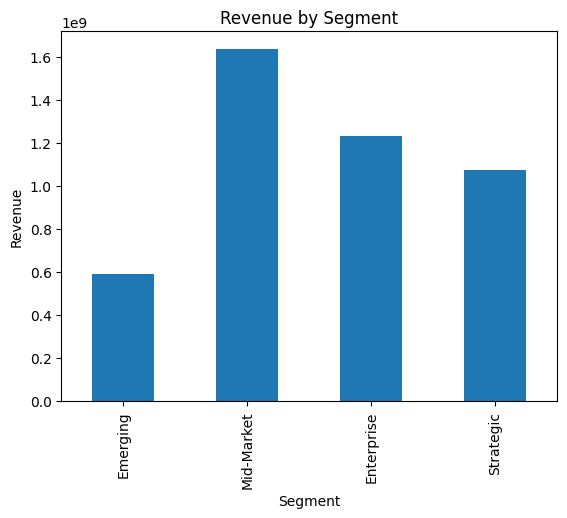

In [56]:
revenue_by_segment = revenue_by_segment.reindex(['Emerging', 'Mid-Market', 'Enterprise', 'Strategic'])
revenue_by_segment.plot(kind='bar')

plt.xlabel('Segment')
plt.ylabel('Revenue')
plt.title('Revenue by Segment')
plt.show()


Average revenue per company in each segment:

In [80]:
average_revenue_per_company = df.groupby('Segment')['Company_Revenue'].mean()
average_revenue_per_company = average_revenue_per_company.reindex(['Emerging', 'Mid-Market', 'Enterprise', 'Strategic'])
pd.options.display.float_format = '{:.2f}'.format
print(average_revenue_per_company)

Segment
Emerging      197361.42
Mid-Market    406440.44
Enterprise    622264.56
Strategic    1076076.97
Name: Company_Revenue, dtype: float64


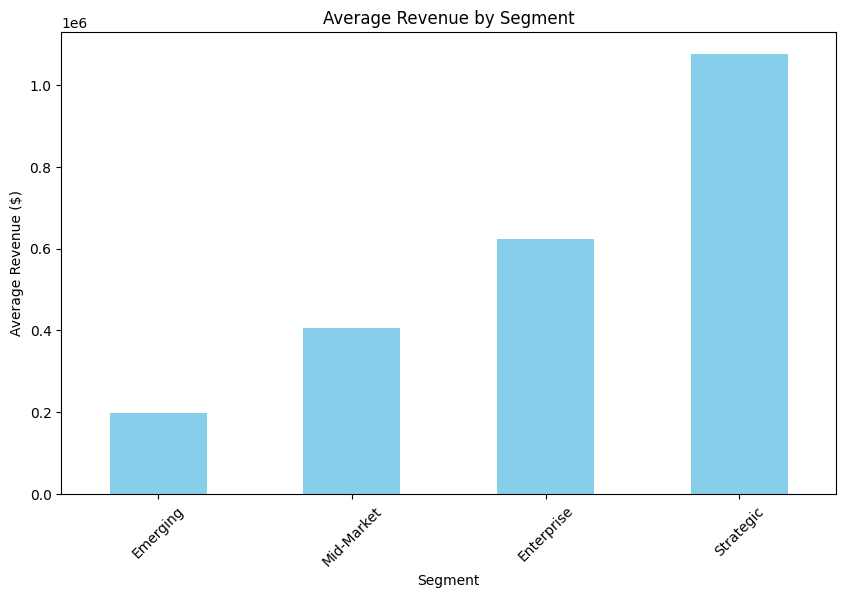

In [81]:
plt.figure(figsize=(10, 6))
average_revenue_per_company.plot(kind='bar', color='skyblue')
plt.title('Average Revenue by Segment')
plt.ylabel('Average Revenue ($)')
plt.xticks(rotation=45)
plt.show()

Percentage of our customers by segment: 

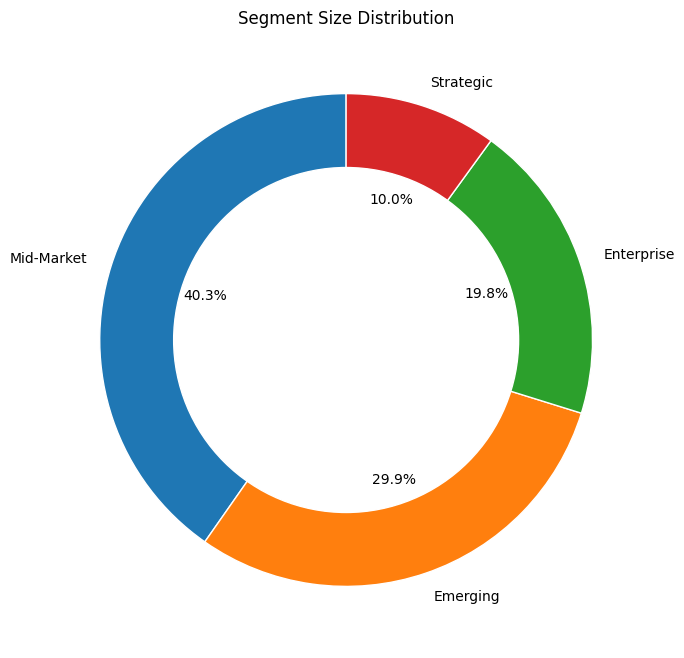

In [76]:
segment_sizes = df['Segment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(segment_sizes, labels=segment_sizes.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})
plt.title('Segment Size Distribution')
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white'))
plt.show()


Let's take a look at how retention rates differ among our segments:

In [85]:
retention_rate_by_segment = df.groupby('Segment')['Churned'].apply(lambda x: (x == 0).sum() / len(x))
retention_rate_by_segment = retention_rate_by_segment.reindex(['Emerging', 'Mid-Market', 'Enterprise', 'Strategic'])

print(retention_rate_by_segment)


Segment
Emerging     0.74
Mid-Market   0.82
Enterprise   0.84
Strategic    0.91
Name: Churned, dtype: float64


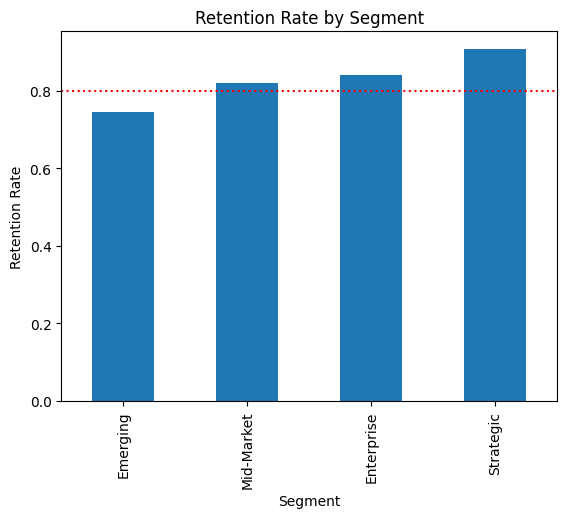

In [40]:
retention_rate_by_segment.plot(kind='bar')
plt.axhline(y=0.8, color='red', linestyle='dotted')
plt.xlabel('Segment')
plt.ylabel('Retention Rate')
plt.title('Retention Rate by Segment')
plt.show()



CSM count by segment:

In this analysis, we assigned 100-200 emerging accounts, 100-150 mid-market, 50-100 enterprise, or 20-50 strategic accounts to individual CSMs.


In [86]:
csm_count_by_segment = df.groupby('Segment')['CSM'].nunique()
csm_count_by_segment = csm_count_by_segment.reindex(['Emerging', 'Mid-Market', 'Enterprise', 'Strategic'])
print(csm_count_by_segment)

Segment
Emerging      18
Mid-Market    28
Enterprise    39
Strategic     48
Name: CSM, dtype: int64


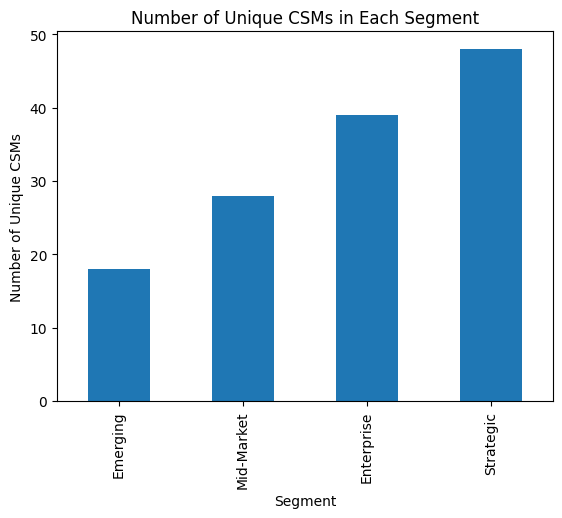

In [87]:
csm_count_by_segment.plot(kind='bar')
plt.xlabel('Segment')
plt.ylabel('Number of Unique CSMs')
plt.title('Number of Unique CSMs in Each Segment')
plt.show()

Churn by segment:

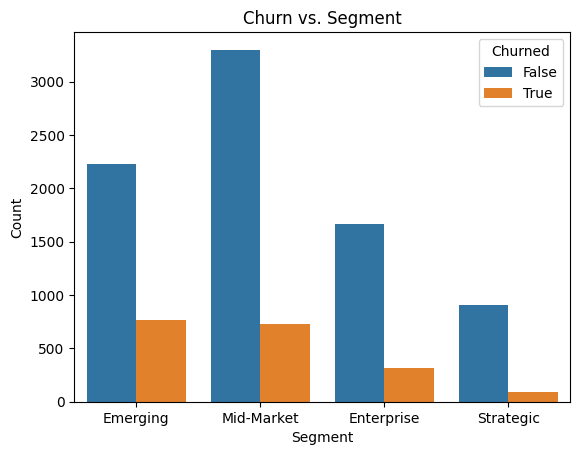

In [44]:
sns.countplot(data=df, x='Segment', hue='Churned', order=['Emerging', 'Mid-Market', 'Enterprise', 'Strategic'])

plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Churn vs. Segment')
plt.show()

Average support requests split by churned:

Significant differences between the churned and not churned.


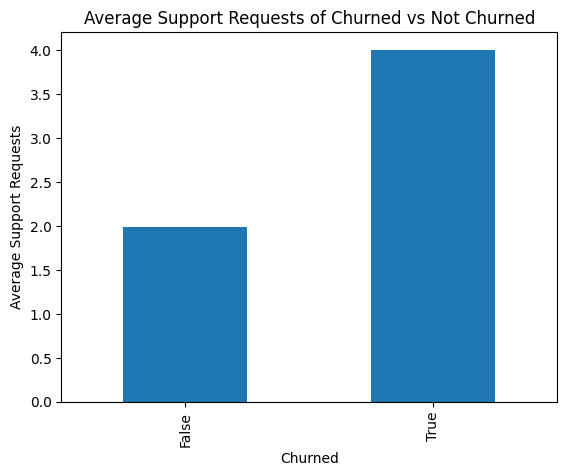

In [88]:
average_support_requests = df.groupby('Churned')['Support_Requests'].mean()

average_support_requests.plot(kind='bar')
plt.xlabel('Churned')
plt.ylabel('Average Support Requests')
plt.title('Average Support Requests of Churned vs Not Churned')
plt.show()




In [18]:
average_support_requests_churned = df[df['Churned'] == 1]['Support_Requests'].mean()

average_support_requests_churned

4.006838506049448

Separating churned customers by engagement score distributions in segments:

Lower engagement scores resulted in churn.

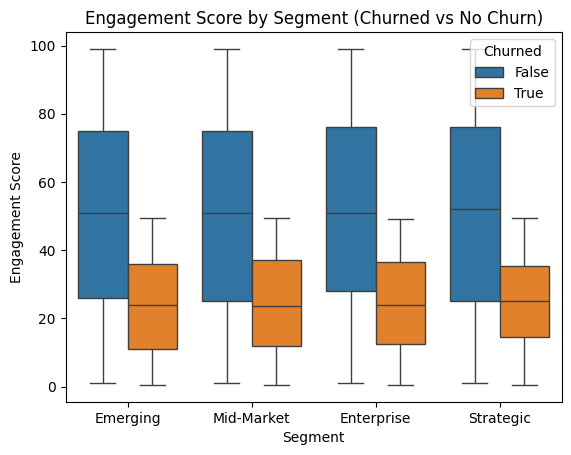

In [89]:
sns.boxplot(data=df, x='Segment', y='Engagement_Score', hue='Churned', order=['Emerging', 'Mid-Market', 'Enterprise', 'Strategic'])
plt.xlabel('Segment')
plt.ylabel('Engagement Score')
plt.title('Engagement Score by Segment (Churned vs No Churn)')
plt.show()


Support requests by segment in churn, customers who were going to churn were requesting more support than non-churned customers.

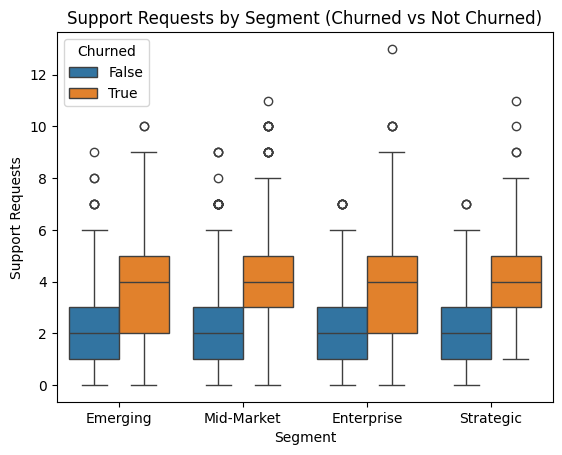

In [67]:
sns.boxplot(data=df, x='Segment', y='Support_Requests', hue='Churned', order=['Emerging', 'Mid-Market', 'Enterprise', 'Strategic'])
plt.xlabel('Segment')
plt.ylabel('Support Requests')
plt.title('Support Requests by Segment (Churned vs Not Churned)')
plt.show()

Showing average support requests and retention rates by segment on the same graph can show differences in behavior + retention.

Combo graphs can be highly effective if personalized to a stakeholder's needs.


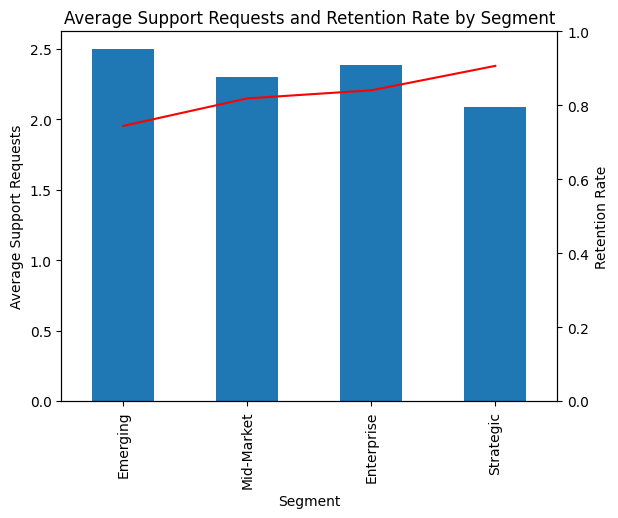

In [50]:
average_support_requests = df.groupby('Segment')['Support_Requests'].mean()
fig, ax1 = plt.subplots()

# Plot average support requests on the left y-axis
average_support_requests.plot(kind='bar', ax=ax1)
ax1.set_xlabel('Segment')
ax1.set_ylabel('Average Support Requests')
ax1.set_title('Average Support Requests and Retention Rate by Segment')

# Create a twin y-axis for retention rate
ax2 = ax1.twinx()

# Plot retention rate on the right y-axis
retention_rate_by_segment.plot(kind='line', ax=ax2, color='red')
ax2.set_ylabel('Retention Rate')
ax2.set_ylim(0, 1) 

# Show the plot
plt.show()


In [ ]:
average_res_requests = df.groupby('Segment')['Time_Resolution'].mean()
fig, ax1 = plt.subplots()

average_support_requests.plot(kind='bar', ax=ax1)
ax1.set_xlabel('Segment')
ax1.set_ylabel('Average Support Requests')
ax1.set_title('Average Support Requests and Retention Rate by Segment')

ax2 = ax1.twinx()

retention_rate_by_segment.plot(kind='line', ax=ax2, color='red')
ax2.set_ylabel('Retention Rate')
ax2.set_ylim(0, 1) 

plt.show()


Below is a good concept, viewing health scores by the resolution times. Also tiering by segments can let you know if they behave differently. Since it is artificial data the trends may not be as clear.

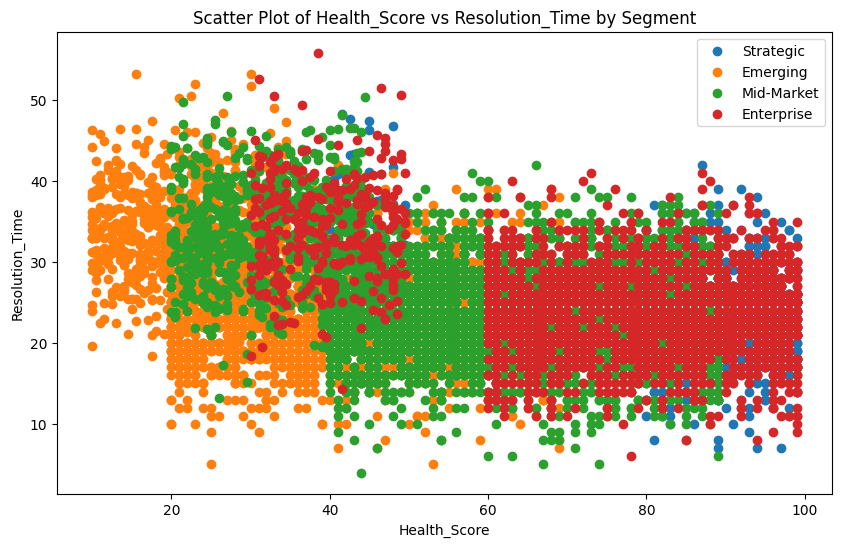

In [66]:
plt.figure(figsize=(10, 6))
for segment in df['Segment'].unique():
    segment_data = df[df['Segment'] == segment]
    plt.scatter(segment_data['Health_Score'], segment_data['Resolution_Time'], label=segment)
plt.xlabel('Health_Score')
plt.ylabel('Resolution_Time')
plt.title('Scatter Plot of Health_Score vs Resolution_Time by Segment')
plt.legend()
plt.show()


In [115]:
df.Product_Features_Used.value_counts()

Product_Features_Used
5     1797
4     1764
6     1497
3     1374
7     1014
2      807
8      638
9      367
1      352
10     169
11      90
0       79
12      29
13      12
14       9
17       1
20       1
Name: count, dtype: int64

Below are some interesting concepts of product feature comparisons to track how customers through automated signals such as used X amount of features.


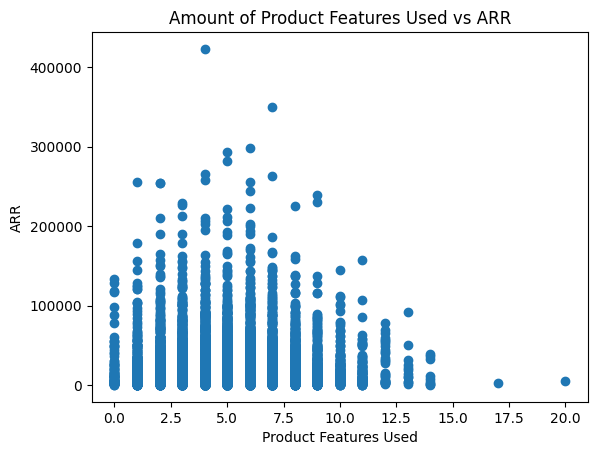

In [116]:
plt.scatter(df['Product_Features_Used'], df['ARR'])
plt.xlabel('Product Features Used')
plt.ylabel('ARR')
plt.title('Amount of Product Features Used vs ARR')
plt.show()



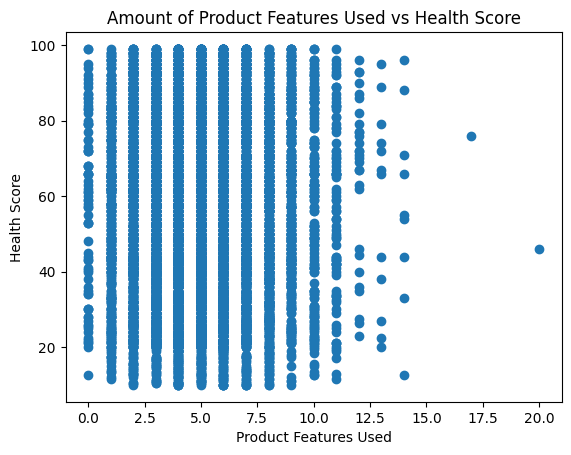

In [118]:
plt.scatter(df['Product_Features_Used'], df['Health_Score'])
plt.xlabel('Product Features Used')
plt.ylabel('Health Score')
plt.title('Amount of Product Features Used vs Health Score')
plt.show()


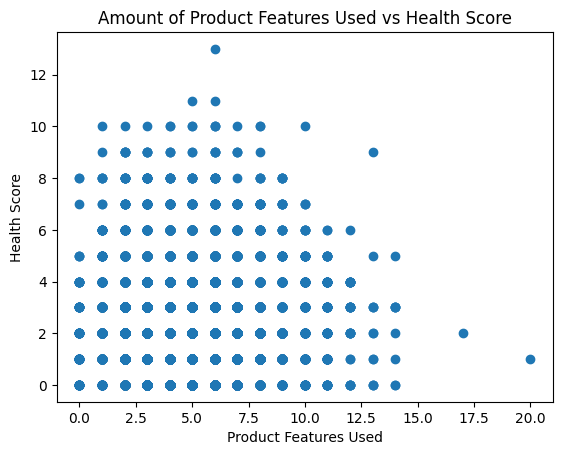

In [119]:
plt.scatter(df['Product_Features_Used'], df['Support_Requests'])
plt.xlabel('Product Features Used')
plt.ylabel('Health Score')
plt.title('Amount of Product Features Used vs Health Score')
plt.show()